# Introduction
L'analyse discriminante linéaire (LDA) est le plus souvent utilisée comme technique de réduction de la dimensionnalité lors de l'étape de prétraitement pour les applications de classification de modèles et d'apprentissage automatique. L'objectif est de projeter un jeu de données sur un espace de dimension inférieure avec une bonne séparabilité de classe afin d'éviter les surajustements («malédiction de la dimensionnalité») et de réduire les coûts de calcul.

# Objectif

Le but de ce kernel, c'est d'appliquer la LDA à partir de cette base de donnée

## Dataset
La base de donnée est une base qui nous dit qui a eu son crédit et qui ne l'a pas eu. La base nous porpose un jeu de donnée de 150000 lignes et 10 colonnes 


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import math
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

%matplotlib inline

# S'apporcher de la LDA 

Calculer les vecteurs moyens d-dimensionnels

Calculez les matrices de dispersion (matrice de dispersion intra-classe et intra-classe).

Calculer les vecteurs propres ( $e_1$,$e_2$,. . . ,$e_d$) et les valeurs propres correspondantes ( $λ_1$,$λ_2$,. . . ,$λ_d$) pour les matrices de dispersion.

Triez les vecteurs propres en diminuant les valeurs propres et choisissez kvecteurs propres avec les plus grandes valeurs propres pour former un $d$ × $k$ matrice dimensionnelle $W $(où chaque colonne représente un vecteur propre).

Utilisez ce $d$ × $k$matrice de vecteurs propres pour transformer les échantillons dans le nouveau sous-espace. Ceci peut être résumé par la multiplication de la matrice: $Y= X$ × $W$

In [2]:
data = pd.read_csv('cs-training.csv', index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
data.fillna(data.median(), inplace=True)
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.418455e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.289040e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


# Observation de la base 

Distribution of the target:


0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64

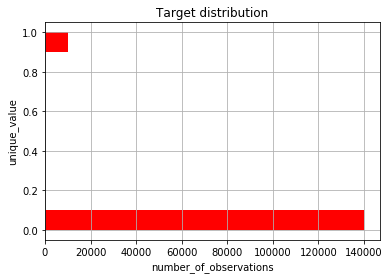

In [4]:
ax = data['SeriousDlqin2yrs'].hist(orientation='horizontal', color='red')
ax.set_xlabel("number_of_observations")
ax.set_ylabel("unique_value")
ax.set_title("Target distribution")

print('Distribution of the target:')
data['SeriousDlqin2yrs'].value_counts()/data.shape[0]

# Scinder la base en deux

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

target = 'SeriousDlqin2yrs'
feats = [x for x in data.columns if x!=target]
x = data[feats]
y = data[[target]]

# Calcul des vecteurs moyens d-dimensionnels

Dans cette première étape, nous allons commencer par un calcul simple des vecteurs moyens de la classe que nous cherchons soit 'SeriousDlqin2yrs'
Soit X une variable aléatoire à valeurs dans R


In [6]:
mean_vectors=data.groupby(target).mean()
mean_vectors

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,,,,,,,,,,
0,6.168855,52.751375,0.280109,357.151168,6477.623137,8.493620,0.135225,1.020368,0.126666,0.723527
1,4.367282,45.926591,2.388490,295.121066,5592.401456,7.882306,2.091362,0.988530,1.828047,0.931279


# Calcul des matrices de dispersion

# Nous cherchons à :
    Maximiser la distance entre les centres de garvité :
            Maximiser la variance inter-groupe
    Minimiser la distance entre les points d'une classe et leur centre de gravité :
            Minimiser la variance intra-groupe

$$S=S_W+S_B$$
$S$ est la matrice de varaiance-covariance total

$S_B$ est la matrice de variance-covariance inter (ou between)

$S_W$ est la matrice de varaince-covariance intra (ou Within)

Nous allons maintenant calculer les deux matrices de dimensions 10x10 : la matrice de dispersion intra-classe et la matrice de dispersion inter-classe. 

## Matrice de dispersion intra-classes

## Calcul de la matrice intra-classes
$$S_W = \sum\limits_{i=1}^{c}  S_i$$

$$S_i = \sum_{i=1}^{n}{(x-m_i)(x-m_i)^T}$$

$x$ est notre base de donnée pour la classe,
$m_i$ est la moyenne des données pour chaque classe



In [7]:
df0 = data.loc[data[target]==0, feats]
df1 = data.loc[data[target]==1, feats]

a1 = df1-df1.mean()
a1T = a1.T
Si1 = a1T.dot(a1)

a0 = df0-df0.mean()
a0T = a0.T
Si0 = a0T.dot(a0)

In [8]:
df1

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
14,0.964673,40,3,0.382965,13700.0,9,3,1,1,2.0
22,0.025656,38,0,0.475841,3000.0,7,0,1,0,2.0
26,0.392248,50,0,1.595253,4676.0,14,0,3,0,1.0
52,0.728150,31,0,0.824725,3000.0,10,0,2,0,1.0
75,0.133063,49,1,0.182882,10257.0,9,0,2,0,3.0
89,0.734478,45,0,0.591478,4716.0,13,0,2,0,2.0
163,1.046279,47,1,1.104301,5416.0,6,0,2,0,1.0
180,0.946964,35,0,1593.000000,5400.0,6,0,1,0,1.0
185,0.085338,51,0,0.477504,6200.0,11,0,1,0,0.0


In [9]:
SW= Si0+Si1
SW

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
RevolvingUtilizationOfUnsecuredLines,9.356569e+09,-3.379084e+06,-1.707800e+05,3.013644e+08,3.130267e+09,-2.185038e+06,-1.327900e+05,2.633456e+05,-1.344335e+05,5.298167e+04
age,-3.379084e+06,3.229521e+07,-4.506150e+05,1.052551e+08,7.312470e+08,1.645135e+06,-4.386708e+05,8.095239e+04,-4.176254e+05,-5.158091e+05
NumberOfTime30-59DaysPastDueNotWorse,-1.707800e+05,-4.506150e+05,2.595305e+06,-7.160609e+06,-5.038983e+07,-1.669514e+05,2.540547e+06,-2.108891e+04,2.545727e+06,-7.293386e+03
DebtRatio,3.013644e+08,1.052551e+08,-7.160609e+06,6.228655e+11,-7.146164e+10,7.760977e+07,-9.467599e+06,4.143797e+07,-8.580528e+06,-1.492933e+07
MonthlyIncome,3.130267e+09,7.312470e+08,-5.038983e+07,-7.146164e+10,2.491685e+13,8.600764e+08,-6.844928e+07,2.537297e+08,-6.024171e+07,1.436637e+08
NumberOfOpenCreditLinesAndLoans,-2.185038e+06,1.645135e+06,-1.669514e+05,7.760977e+07,8.600764e+08,3.968599e+06,-2.462204e+05,3.782542e+05,-2.182358e+05,6.444352e+04
NumberOfTimes90DaysLate,-1.327900e+05,-4.386708e+05,2.540547e+06,-9.467599e+06,-6.844928e+07,-2.462204e+05,2.571647e+06,-3.135702e+04,2.548756e+06,-1.208397e+04
NumberRealEstateLoansOrLines,2.633456e+05,8.095239e+04,-2.108891e+04,4.143797e+07,2.537297e+08,3.782542e+05,-3.135702e+04,1.914466e+05,-2.746390e+04,2.433732e+04
NumberOfTime60-89DaysPastDueNotWorse,-1.344335e+05,-4.176254e+05,2.545727e+06,-8.580528e+06,-6.024171e+07,-2.182358e+05,2.548756e+06,-2.746390e+04,2.562728e+06,-1.205461e+04
NumberOfDependents,5.298167e+04,-5.158091e+05,-7.293386e+03,-1.492933e+07,1.436637e+08,6.444352e+04,-1.208397e+04,2.433732e+04,-1.205461e+04,1.834194e+05


## Matrice de dispersion entre classes 


## Calcul de la matrice inter-classes

$$S_B = \sum_{i=1}^{c}{N_i(m_i-m)(m_i-m)^T}$$
$m$ est la moyenne global, $m_i$ et $N_i$ sont les moyennes et la taille respective de chaque classe.

In [10]:
df0 = data.loc[data[target]==0, feats]
df1 = data.loc[data[target]==1, feats]

b1 = (df1.mean()-data[feats].mean()).to_frame()
b1T = b1.T

b0 = (df0.mean()-data[feats].mean()).to_frame()
b0T = b0.T

In [11]:
Sb0 = len(df0)*b0.dot(b0T)
Sb1 = len(df1)*b1.dot(b1T)
Sb=Sb0+Sb1
Sb

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
RevolvingUtilizationOfUnsecuredLines,3.036601e+04,1.150336e+05,-3.553733e+04,1.045534e+06,1.492065e+07,1.030387e+04,-3.297123e+04,536.642331,-2.867724e+04,-3.501707e+03
age,1.150336e+05,4.357744e+05,-1.346238e+05,3.960730e+06,5.652295e+07,3.903348e+04,-1.249028e+05,2032.927464,-1.086361e+05,-1.326529e+04
NumberOfTime30-59DaysPastDueNotWorse,-3.553733e+04,-1.346238e+05,4.158933e+04,-1.223588e+06,-1.746163e+07,-1.205861e+04,3.858622e+04,-628.032317,3.356096e+04,4.098047e+03
DebtRatio,1.045534e+06,3.960730e+06,-1.223588e+06,3.599886e+07,5.137340e+08,3.547732e+05,-1.135235e+06,18477.169299,-9.873879e+05,-1.205675e+05
MonthlyIncome,1.492065e+07,5.652295e+07,-1.746163e+07,5.137340e+08,7.331417e+09,5.062912e+06,-1.620075e+07,263684.735442,-1.409086e+07,-1.720600e+06
NumberOfOpenCreditLinesAndLoans,1.030387e+04,3.903348e+04,-1.205861e+04,3.547732e+05,5.062912e+06,3.496333e+03,-1.118788e+04,182.094764,-9.730829e+03,-1.188208e+03
NumberOfTimes90DaysLate,-3.297123e+04,-1.249028e+05,3.858622e+04,-1.135235e+06,-1.620075e+07,-1.118788e+04,3.579996e+04,-582.682925,3.113757e+04,3.802132e+03
NumberRealEstateLoansOrLines,5.366423e+02,2.032927e+03,-6.280323e+02,1.847717e+04,2.636847e+05,1.820948e+02,-5.826829e+02,9.483793,-5.067975e+02,-6.188380e+01
NumberOfTime60-89DaysPastDueNotWorse,-2.867724e+04,-1.086361e+05,3.356096e+04,-9.873879e+05,-1.409086e+07,-9.730829e+03,3.113757e+04,-506.797482,2.708238e+04,3.306963e+03
NumberOfDependents,-3.501707e+03,-1.326529e+04,4.098047e+03,-1.205675e+05,-1.720600e+06,-1.188208e+03,3.802132e+03,-61.883805,3.306963e+03,4.038052e+02


# Résoudre le problème généralisé des valeurs propres pour la matrice 

Si nous exécutons la LDA pour la réduction de la dimensionnalité, les vecteurs propres sont importants car ils formeront les nouveaux axes de notre nouveau sous-espace de fonctionnalités; les valeurs propres associées présentent un intérêt particulier puisqu'elles nous indiqueront à quel point les nouveaux «axes» sont «informatifs».

$$S=S_W+S_B$$
Soit $u$ un axe et $S(u)$ la variance total
On peut montrer que :

$$S(u)=u^tVu$$ $$S_W(u)=u^tS_Wu$$  $$S_B(u)=u^tS_Bu$$

Après projection suur l'axe $u$, la décompossition da la variance est conservée :
$$S(u)=S_W(u)+S_B(u)$$
Un axe $u$ est discriminant si :

La variance inter-classe projetée sur $u$ est grande : $S_B(u)$ grand.

La variance intra-classe projetée sur $u$ est petite : $S_W(u)$ petit.

Soit $u$ la solution du problème de discrimination :

$$u=argmax(S_B(u)/S_W(u))$$

On peut montrer que résoudre l'équation ci-dessus revient à résoudre:

$$S_W^-1S_Bu=\lambda{}u$$

$u$ l'ensemble des vecteurs propres associé

Pour résoudre on utilisera une fonction de python

In [12]:
A = np.linalg.inv(SW).dot(Sb)
eig_vals, eig_vecs = np.linalg.eig(A)

# Véréfication

$$ Av=\lambda{}v $$

$$ A=S_W^-1S_B $$
$$ \lambda{}= Valeur Propre $$
$$ v=Vecteur Propre $$

In [13]:
A.dot(eig_vecs)

array([[ 1.48272495e-21, -1.07362677e-06,  4.12058178e-21,
         1.37613414e-20, -1.98441588e-21,  1.00552118e-21,
         5.75448527e-21,  8.93929138e-22,  3.44107135e-22,
        -1.85288457e-22],
       [ 7.57027712e-19, -8.01545270e-04,  2.14412385e-18,
         9.71273813e-18, -1.93961657e-18,  7.82223740e-19,
         4.31800508e-18,  8.14601700e-19,  2.16840434e-19,
        -1.28749008e-19],
       [ 7.16241428e-19,  2.44726191e-02, -1.33019552e-16,
        -2.82000635e-16,  3.42257547e-17, -2.05697991e-17,
        -1.18501910e-16, -1.91834588e-17, -5.20417043e-18,
         5.63785130e-18],
       [ 1.33893535e-22, -2.19673385e-07,  9.88478129e-22,
         2.74359009e-21, -5.50380593e-22,  1.54737154e-22,
         1.17651816e-21,  1.72400512e-22,  9.92616735e-23,
        -4.13590306e-23],
       [ 1.26532998e-22, -1.35605669e-07,  4.13800893e-22,
         1.72060939e-21, -6.51164111e-23,  1.36769422e-22,
         6.88511866e-22,  1.21882781e-22,  3.14328633e-23,
        -2.

In [14]:
eig_vecs*eig_vals

array([[ 1.78060223e-18, -1.07362677e-06,  5.58577026e-21,
         1.31347291e-20,  2.60099104e-21, -3.74332195e-23,
        -4.85032505e-22,  5.32947568e-24, -3.84113751e-24,
         9.52058005e-25],
       [-9.14093159e-20, -8.01545270e-04,  1.15840798e-18,
         9.04146765e-18, -5.03257909e-18,  8.89425634e-22,
        -2.56466117e-20, -3.06878298e-21, -1.97974961e-22,
         1.94278498e-22],
       [ 2.79089086e-18,  2.44726191e-02, -1.32442710e-16,
        -2.70111814e-16,  1.35690282e-17,  3.48508798e-20,
         1.30956292e-19,  4.94781284e-21, -6.18330372e-22,
        -6.59016120e-22],
       [-2.50518525e-23, -2.19673385e-07,  1.05362312e-21,
         2.36547855e-21, -1.01779138e-21, -2.42507214e-23,
         1.59073464e-22,  5.12532004e-23,  4.20271090e-23,
        -1.63372356e-23],
       [-1.54646554e-23, -1.35605669e-07,  3.82965600e-22,
         1.57902687e-21, -2.12191303e-22,  3.29816591e-23,
         6.97872949e-23,  3.43798932e-23,  6.18062297e-25,
         1.

Nous avons vérifié l'équation


# Tri des vecteurs propres en diminuant les valeurs propres
Rappelez-vous de l'introduction que nous ne souhaitons pas seulement projeter les données dans un sous-espace améliorant la séparabilité des classes, mais également réduire la dimensionnalité de notre espace de fonctions (où les vecteurs propres formeront les axes de ce nouveau sous-espace de fonctions).

Cependant, les vecteurs propres ne définissent que les directions du nouvel axe, car ils ont tous la même longueur unitaire 1.

Donc, afin de décider quel (s) vecteur (s) propre (s) nous voulons abandonner pour notre sous-espace de dimension inférieure, nous devons examiner les valeurs propres correspondantes des vecteurs propres. Les vecteurs propres avec les valeurs propres les plus basses portent le moins d'informations sur la distribution des données, et ce sont ceux que nous voulons supprimer. 
L’approche commune consiste à classer les vecteurs propres de la valeur propre la plus élevée à la plus faible et à choisir les k vecteurs propres.

In [15]:
 [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

[(6.938893903907228e-18,
  array([-2.56611825e-01,  1.31734707e-02, -4.02209761e-01,  3.61035243e-06,
          2.22869172e-06,  6.00617484e-03, -4.19877316e-01, -6.13128903e-03,
          7.70758022e-01, -4.20188360e-02])),
 (0.058807976977197855,
  array([-1.82564819e-05, -1.36298732e-02,  4.16144550e-01, -3.73543517e-06,
         -2.30590603e-06, -6.21426221e-03,  4.34424207e-01,  6.34371106e-03,
         -7.97461377e-01,  4.34746027e-02])),
 (1.7916462045119456e-16,
  array([-3.11767482e-05, -6.46560675e-03,  7.39223566e-01, -5.88075435e-06,
         -2.13750683e-06, -1.44358672e-02, -6.35805903e-01, -3.82109836e-03,
         -2.20318630e-01,  2.22322825e-02])),
 (7.405309347993142e-16,
  array([ 1.77369081e-05,  1.22094395e-02, -3.64754261e-01,  3.19430079e-06,
          2.13229022e-06,  7.37161887e-03, -3.16680850e-01, -4.91462641e-03,
          8.74329839e-01, -4.45795465e-02])),
 (3.477229345176417e-17,
  array([-7.48006754e-05,  1.44729570e-01, -3.90225286e-01,  2.92701825e-05

In [16]:
np.abs(eig_vals)

array([6.93889390e-18, 5.88079770e-02, 1.79164620e-16, 7.40530935e-16,
       3.47722935e-17, 5.17016795e-19, 7.11227432e-19, 3.21410478e-19,
       3.53813110e-20, 3.16764623e-20])

In [17]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort()
eig_pairs.reverse()

print('Valeur propres en ordre décroissant:\n')
for i in eig_pairs:
    print(i[0])

Valeur propres en ordre décroissant:

0.058807976977197855
7.405309347993142e-16
1.7916462045119456e-16
3.477229345176417e-17
6.938893903907228e-18
7.112274322840164e-19
5.170167947516159e-19
3.214104781143672e-19
3.5381311026715683e-20
3.1676462284856775e-20


In [18]:
print('Variance expliquer:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('Valeur Propre {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance expliquer:

Valeur Propre 1: 100.00%
Valeur Propre 2: 0.00%
Valeur Propre 3: 0.00%
Valeur Propre 4: 0.00%
Valeur Propre 5: 0.00%
Valeur Propre 6: 0.00%
Valeur Propre 7: 0.00%
Valeur Propre 8: 0.00%
Valeur Propre 9: 0.00%
Valeur Propre 10: 0.00%


# Choisir sa valeur propre
Comme nous pouvons l'oberserver, il en ressort que nous avons juste une seul valeur propre qui justifie la variance

Après avoir trié les eigenpairsen, il est maintenant temps de construire notre $k × d-dimensionnelle$  de vecteur propre $W$ (ici 10 × 1 : basé sur la paire propre la plus informative) et réduisant ainsi l’espace initial des caractéristiques à 10 dimensions en un sous-espace à 1 dimension.

In [19]:
W = np.hstack((eig_pairs[0][1].reshape(10,1)))
print('Matrice W:\n', W.real)

Matrice W:
 [-1.82564819e-05 -1.36298732e-02  4.16144550e-01 -3.73543517e-06
 -2.30590603e-06 -6.21426221e-03  4.34424207e-01  6.34371106e-03
 -7.97461377e-01  4.34746027e-02]


# Transformation des données dans le nouveau sous-espace 
Dans la dernière étape, nous utilisons le $10 × 1-dimension$ matrcie de $W$ que nous venons de calculer afin de transformer nos données dans le nouvel sous-espace.

$$Y= x × W$$.

(où $x$ est un $n × d-dimension$ de matrcie représentant les données et $Y$ est la transformé  de $n$ x $k-dimonsion$).

In [20]:
Y = x.dot(W)

# Affichons notre nouvel espace

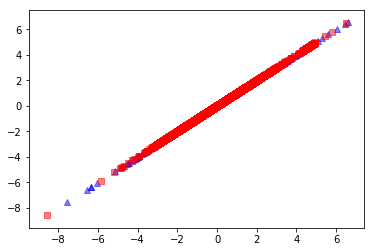

In [21]:
ax = plt.subplot(111)
for label,marker,color in zip([0,1], ('^', 's'), ('blue', 'red')):

    ax.scatter(x=Y[(data[target]==label)],
               y=Y[(data[target]==label)],
                marker=marker,
                color=color,
                alpha=0.5,
                )


plt.show()

# Mainetant comparons notre nouvel espace à celui de Sklearn
Pour ce faire, nous utilisons la fonction de transformation de Sklearn en LDA

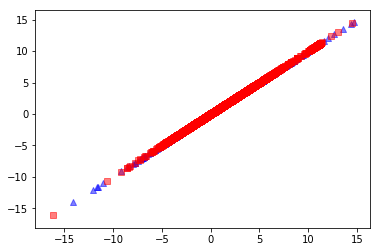

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)

X_lda = lda.fit_transform(x, y.values.ravel())

ax = plt.subplot(111)
for label,marker,color in zip([0,1], ('^', 's'), ('blue', 'red')):

    ax.scatter(x=X_lda[(data[target]==label)],
               y=X_lda[(data[target]==label)],
                marker=marker,
                color=color,
                alpha=0.5,
                )


plt.show()

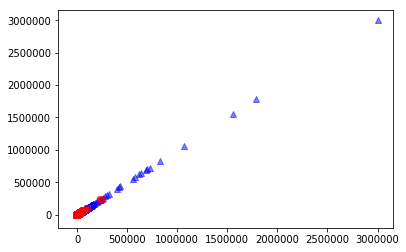

In [23]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=1)
X_pca = sklearn_pca.fit_transform(x)
ax = plt.subplot(111)
for label,marker,color in zip([0,1], ('^', 's'), ('blue', 'red')):

    ax.scatter(x=X_pca[(data[target]==label)],
               y=X_pca[(data[target]==label)],
                marker=marker,
                color=color,
                alpha=0.5,
                )


plt.show()

# Conclusion
Nous observons que nous sommes proche de la LDA de SKlearn. Cependant nous observons que nos classes ne sont pas séparé comme nous l'espeirions. Cela est finallement dû à la valeur prope $\lambda{}$ qui est trop porche de 0.
Nous avons donc oberserver que quand la valeur propre est 0<$\lambda{}$<1 groupe séparable.
quand la valeur propre est $\lambda{}$=1 groupe très séparable.
